# 14.38 PS4
In this problem set, I will answer questions 1 & 4 from CM-2.

## CM2 - Question 1

Often in empirical work, we are not able to conduct a randomized controlled trial, where we can randomize treatment in such a way so that baseline potential outcome is uncorrelated with treatment. However, by including controls in a regression, we can find a treatment effect _as if_ treatment were randomly assigned, conditional on covariates. Our basic set up is the typical potential outcomes setup with an indicator variable $D$ for treatment status. That is, we observe $Y = Y(d)$. We can find the average predictive effect 

$$\pi =E[Y(1)|D=1] - E[Y(1)|D=0]$$

but this is not equal to our average treatment effect, because $Y$ is not orthogonal to $D$. However, let's suppose that we observe a set of covariates $X$, which satisfy the conditions

$$ D \perp Y|X \\
P(0 < P(D=1|X) < 1) = 1$$

That is, $D$ is uncorrelated with $Y$ conditional on $X$ and the probability of being treated given a value of $X$ is not 0 or 1. Now, we can now find the average treatment effect:

$$ \delta = E[Y | D=1, X] - E[Y|D=0, X] = E[Y(1)|X] - E[Y(0)|X] $$

Under a linear conditional expectation function, $\delta$ would be exactly equal to a population regression coefficient on $D$ in a regression of $Y$ on $D$ and $X$.

$$Y=\alpha + \delta D + \beta' X + \varepsilon$$

Thus, for a given value of covariates $X$, treatment is as good as randomly assigned, so we can identify the average treatment effect.


## CM2 - Question 4


In the context of SEMs, collider bias occurs when conditioning on a common outcome variable leads to a misrepresentation in the relationship between two other variables. Let's consider the SEM

$$A = \varepsilon_A \\ B = \varepsilon_B \\ C= A + B + \varepsilon_C$$

where $\varepsilon_i \sim \mathcal{N}(0,1)$ for $i = A, B ,C$. If we consider the CEF of $A$ given $B$, it is clear that $E[A|B]=0$, because $A$ and $B$ are completely uncorrelated. However, what happens when we condition on $C$? The DAG for this set up looks like this:

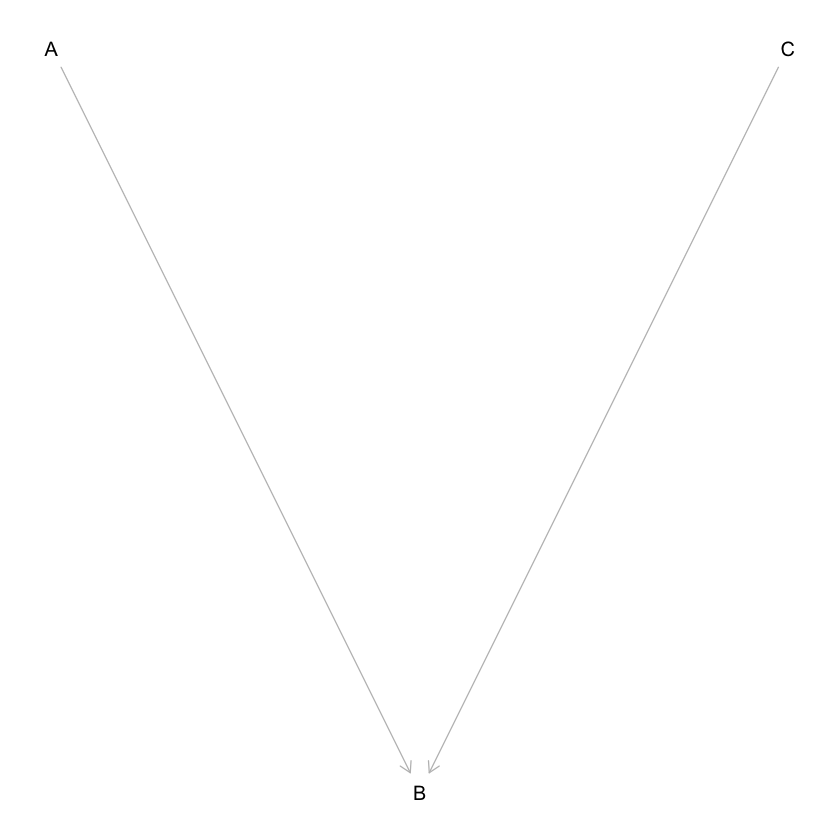

In [60]:
library(dagitty)

dag <- dagitty("dag{A -> B <- C}")
coordinates(dag) <- list( x=c(A=1, B=1.5, C=2), y=c(A=1, B=1.5, C=1))
plot(dag)

One easy way to see what happens when we condition on $C$ is to remove the randomness from the model. Consider the equation $c = x + y$, where $(x,y)$ is an ordered pair in $\mathbb{R}^2$. Is clear that if we took the derivative of $y$ with respect to $x$, we would get $-1$. So, in that sense, for a given value $c$, $x$ and $y$ are inversely proportional. A similar reasoning holds in our SEM. 

Unconditional on $C$, we have that $E[B|A]=0$. When we condition on $C$, we have that 

$$E[A|B,C] = E[C-B-\varepsilon_C|B,c] = C-B - E[\varepsilon_C | C] = \frac{C-B}{2}$$

Therefore, when we run the regression 

$$ A = \alpha + \beta_1B + \beta_2C + \varepsilon$$

we find that $\beta_1 = \frac{-1}{2}$. What does this $\beta_1$ represent? This is exactly the average predictive effect. In contrast, we know that our atreatment effect is 0.

We can numerically simulate this scenario for large $n$.

In [62]:
n <- 100000
A <- rnorm(n)
B <- rnorm(n)


C <- A+B+rnorm(n)

summary(lm(A~B))$coef
summary(lm(A~B+C))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.002053166,0.003163751,-0.6489656,0.5163621
B,0.003830576,0.003161947,1.2114612,0.2257216


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.001455985,0.002236550,-0.6509961,0.5150505
B,-0.494956006,0.002735300,-180.9512896,0.0000000
C,0.499907182,0.001580061,316.3846478,0.0000000


We find exactly what we expect. There is no association between $A$ and $B$ unconditionally, but there is when we condition on the collider $C$. In summary, there is no causal relationship between $A$ and $B$, but when we link them both to $C$, we find that holding $C$ constant, if $A$ increases, then $B$ must decrease, and vice versa. This is analogous to the example of the line in $\mathbb{R}^2$. While this is a simplified example, it is important to be mindful of conditioning on endogeneous variables, as we might find spurious relationships between causally unrelated things. This is related to the phenomenon of confounder bias, but instead of two variables having a common cause, they have a common effect.